RL Fall 99

Homework #4 Report - MDP

Ali Elahi SID: 810696336

In [1]:
import random
import pprint
import io
import numpy as np
import sys
import numpy as np
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import bisect
from tqdm import tqdm

# Algorithms:
__MC methods:__ The Monte Carlo methods learn value functions and optimal policies from experience in the form of sample episodes. This gives them at least three kinds of advantages over DP methods. First, they can be used to learn optimal behavior directly from interaction with the environment, with no model of the environment’s dynamics. Second, they can be used with simulation or sample models. these methods mostly vary in two types of On and off policy. __Low sample efficiency__ is a disadvantage according to this family of algorithms<br><br>
__TD methods:__ TD methods are alternatives to Monte Carlo methods for solving the prediction problem. In both cases, the extension to the control problem is via the idea of generalized policy iteration that have been abstracted from dynamic programming. This is the idea that approximate policy and value functions should interact in such a way that they both move toward their optimal values. <br><br>
__n_step bootstraping methods:__ These types on algorithms lie in between the one-step TD methods and the Monte Carlo methods. A drawback according to this family of algorithms is that they involve more computation per time step than previous methods, also compared to one-step methods, n-step methods also require more memory to record stats variables.

- __MC methods: On policy__<br><br>
- __MC methods: Off policy__<br><br>
- __TD methods: SARSA algorithm__ <br>
An on policy method which uses each step in episode to update Qs.<br><br>
- __TD methods: Double Q-learning__<br>
An off policy method based on TD, It prevents maximization bias, Also is capable of early coverage.<br><br>
- __TD methods: n-step expected SARSA algorithm__<br><br>
- __TD methods: n-step tree backup__<br><br>

![image.png](./codes/images/dif1.png)

# Hyperparameters:

- Learning rate <br>
learning rates which used in TD algoeithms. chosen values were mostly between 0.2 - 0.5

- n: <br>
    n_step sarsa or n_step tree backup

- epsilon in e-greedy policies: <br>
gradual reduction of epsilon in e-greedy algoithms is pretty important. A rapid decrease may lead to a sub optimal answer and a slow decrease, increases the convergence time. The following function is used to control the rate of epsilon reduction over number of episodes. <br>
decay_rate is a parameter that controls the rate of decrease. the more it is, the alpha will decay slower.

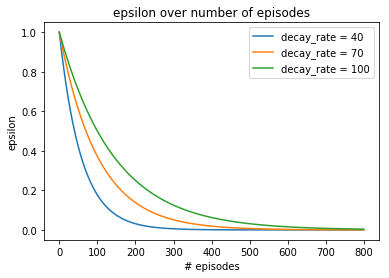

(<matplotlib.legend.Legend at 0x119b7bf50>, None)

In [2]:
def epsilon(x, decay_rate = 20):
    return 2 ** (1 - int(x)/decay_rate) / 2
plt.plot([epsilon(i, decay_rate = 40) for i in range(800)], label = 'decay_rate = 40')
plt.plot([epsilon(i, decay_rate = 70) for i in range(800)], label = 'decay_rate = 70')
plt.plot([epsilon(i, decay_rate = 100) for i in range(800)], label = 'decay_rate = 100')
plt.title('epsilon over number of episodes'), plt.xlabel('# episodes'), plt.ylabel('epsilon')
plt.legend(), plt.show()

__Softmax policy, replacement for e-greedy:__ <br>
in some algorithms, a softma policy is used instead of e-greedy policy.
on one of the pros of these kinds of policies is that they are self optimized and we dont need to tune the epsilon parameter. <br> <br>

$$
softmax = \frac{e^{Q(s,a)}}{\sum_{a}{e^{Q(s, a)}}}
$$

$$
\pi(s, a) = softmax(s,a)
$$


# Results

## MC methods: On policy

![image.png](images/on_policy.png)

100%|██████████| 1200/1200 [00:11<00:00, 104.89it/s]


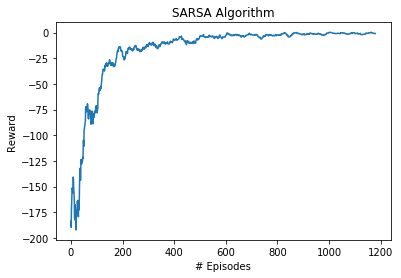

U L L L L L L D D D 
U U L • U R U L R L 
U U D L U R L R D U 
U U U █ █ █ U R U L 
U • U █ R R U U U D 
L L U █ █ U R U R U 
U U • R D L R U L R 
D U D L R R U U D U 
R U D D R D R D L R 
R D U R U R U U R L 


In [3]:
%run 'codes/RL - MDP - MC - On Policy.ipynb'

## MC methods: Off policy

![image.png](images/off_policy.png)

Unfortunatly the Off policy Monte Carlo algorithm did not converge. The problem seems to be that the policy and behavioue were so different from one another that didn't let the algorithm to continue the loop and update the Q-values.

## TD methods: SARSA algorithm

![image.png](images/sarsa1.png)

100%|██████████| 1500/1500 [00:07<00:00, 204.14it/s]


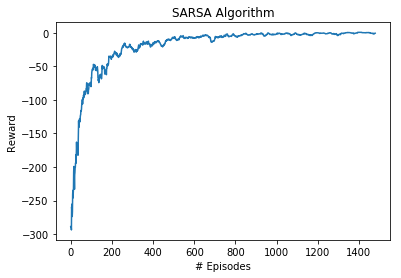

Policy:

R L L L L L L L L L 
U U U • U U L L L L 
R R U L U R U L L L 
U U U █ █ █ U L L L 
U • U █ R R U L U U 
U R U █ █ U U U L L 
U U • R R U U L U L 
U R R R R U U L L L 
U U U R R U U U L L 
R U R R R U U L U L 


In [4]:
%run 'codes/RL - MDP - TD - SARSA.ipynb'

## TD methods: Double Q-learning

![image.png](images/dq1.png)

100%|██████████| 1500/1500 [00:12<00:00, 124.28it/s]


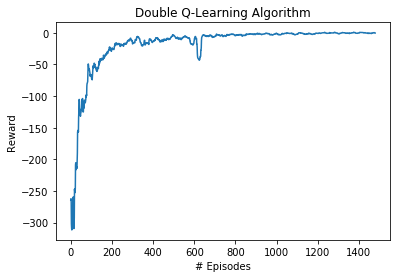

Policy:

L L L L L D L L L L 
U U U • U L L L L L 
U U U R U U U L L L 
U U U █ █ █ U L L L 
U • U █ R R U L L U 
U L U █ █ U U L L L 
U L • R R U U U U L 
U U L U U U U U U L 
U L R U U U U L U L 
U L L U R U U L U U 


In [5]:
%run 'codes/RL - MDP - TD - Double Q-learning.ipynb'

## TD methods: n-step expected SARSA algorithm

![image.png](images/ex_sarsa.png)

__In the following algorithm, n_step is implemented as a hyper parameter which defines the number of steps before calculating the expected values of the algorithm.__

100%|██████████| 1500/1500 [00:26<00:00, 55.86it/s] 


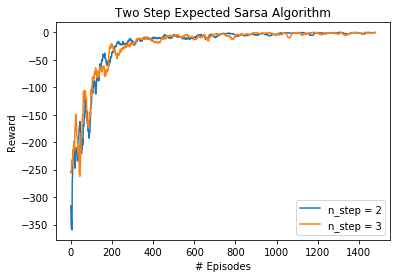

Policy:

U L D L L L L L D D 
U U L • U D U U L L 
U U U L R R U U U L 
U U U █ █ █ U U U U 
U • U █ R R U L U L 
U L L █ █ R R U U R 
D L • D R R U L U U 
D D R R L R U U U U 
R R D D R R R R U U 
R D R R R R R D R R 


In [6]:
%run 'codes/RL - MDP - TD - n step expected SARSA.ipynb'

## TD methods: n-step tree backup

![image.png](images/tb1.png)
![image.png](images/tb2.png)

__In the following algorithm, n_step is implemennted as a hyper parameter.__

100%|██████████| 1500/1500 [01:02<00:00, 23.92it/s] 


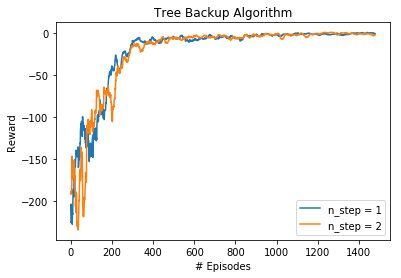

Policy:

U U L L L L D L L L 
U U L • U U R L U L 
U U L L L U U L L L 
U U U █ █ █ U U U L 
U • U █ R R U U U L 
U L U █ █ R U U U U 
D D • D D U U U L U 
D D D D D D R R R U 
D D D D D D R R U U 
L L R R R R R R U U 


In [7]:
%run 'codes/RL - MDP - TD - Tree Backup.ipynb' 

# Comparing Algorithms

 <table>
  <tr>
    <th style="text-align:center;">Algorithm</th>
    <th style="text-align:center;">Time to converge</th>
    <th style="text-align:center;"># Episodes to converge</th>
  </tr>
  <tr>
    <td style="text-align:center;">MC - On policy</td>
    <td style="text-align:center;">7 s</td>
    <td style="text-align:center;">500</td>
  </tr>
  <tr>
    <td style="text-align:center;">TD - SARSA</td>
    <td style="text-align:center;">11 s</td>
    <td style="text-align:center;">400</td>
  </tr>
  <tr>
    <td style="text-align:center;">TD - Double Q-Learning</td>
    <td style="text-align:center;">12 s</td>
    <td style="text-align:center;">600</td>
  </tr>
  <tr>
    <td style="text-align:center;">TD - 2 step Expected SARSA</td>
    <td style="text-align:center;">26 s</td>
    <td style="text-align:center;">< 400</td>
  </tr>
  <tr>
    <td style="text-align:center;">TD - 3 step Expected SARSA</td>
    <td style="text-align:center;">27 s</td>
    <td style="text-align:center;">< 400</td>
  </tr>
  <tr>
    <td style="text-align:center;">TD - 1 step Tree backup</td>
    <td style="text-align:center;">39 s</td>
    <td style="text-align:center;">600</td>
  </tr>
    <tr>
    <td style="text-align:center;">TD - 2 step Tree backup</td>
    <td style="text-align:center;">62 s</td>
    <td style="text-align:center;">600</td>
  </tr>
</table> 

Number of episodes to convergence are mostly the same but for different algorithms, takes different time to converge. It seems like MC - on Policy algorithm outperform the others and takes less time to converge. SARSA and Double Q-Learning are also pretty fast and pretty much the same. time to converge for 1 and 2 step expected sarsa is relativly high and it could be a cause of computational effort of the algorithm but for these type of algorithms, number of episodes to converge is comparatively low. Tree backup algorithms have even more calculations costs than n_step expected sarsa, so it is reasonable to expect longer time to converge.

__References:__